In [143]:
import pandas as pd 
import sympy as sy
from matplotlib import pyplot as plt
import numpy as np  
from scipy.stats import norm as nm
from scipy.stats import lognorm as lm
from scipy.integrate import quad as qd
from scipy import optimize as op

### Exercise 2.1

In [63]:
def intg(g,a,b,N,m):
    if m=='midpoint':
        i=np.arange(N)
        xi=a+(2*i+1)*(b-a)/(2*N)
        y=g(xi)
        return (b-a)*np.sum(y)/N
    
    elif m=='trapezoid':
        i=np.arange(N)
        xi=a+(i*(b-a)/N)
        y=g(xi)
        return (b-a)*(g(a)+2*np.sum(y[1:])+g(b))/(2*N)
    
    else:
        i=np.arange(2*N)
        xi=a+i*(b-a)/(2*N)
        y=g(xi)
        y1=np.sum(y[1:2*N:2])
        y2=np.sum(y[2:2*N:2])
        return (b-a)*(g(a)+4*y1+2*y2+g(b))/(6*N)

In [209]:
x=sy.symbols('x')
g= 0.1*x**4 - 1.5* x**3 +0.53* x**2+2*x+1
g=sy.lambdify(x,g,'numpy')
real_x=4373+1/3
mid = intg(g, -10, 10, 200, 'midpoint')
print("Midpoint error: ", abs(mid-real_x))
tp = intg(g, -10, 10, 200, 'trapezoid')
print("Trapezoid error: ", abs(tp-real_x))
sim = intg(g, -10, 10, 200, 'simpsons')
print("Simpsons error: ", abs(sim-real_x))

Midpoint error:  0.34216083333285496
Trapezoid error:  0.6843266666674026
Simpsons error:  1.6666672308929265e-06


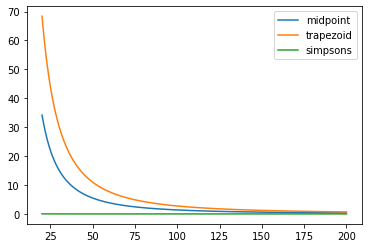

In [60]:
Nvec = np.arange(20, 201, 1)
M=[]
T=[]
S=[]
for N in Nvec:
    M.append(abs(intg(g,-10,10,N,'midpoint')-real_x))
    T.append(abs(intg(g,-10,10,N,'trapezoid')-real_x))
    S.append(abs(intg(g,-10,10,N,'other')-real_x))
    
plt.plot(Nvec,M,label = "midpoint");
plt.plot(Nvec,T,label = "trapezoid");
plt.plot(Nvec,S,label = "simpsons");
plt.legend()

b) 
Becuase the original function looks very smooth, so simpson will have the smallest error beucase it also is using smooth nonlineaer approximation. Because the curve is convex up, the trapezoid rule is consistently overestimating the area, while in midpoint rule, each rectangle sometimes overestimate or underestimate the area, so has smaller error.

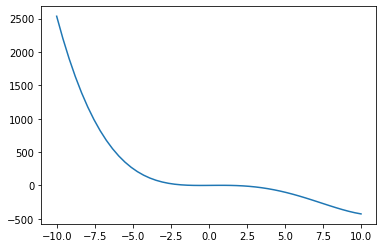

In [62]:
x_b=np.linspace(-10,10)
plt.plot(x_b,g(x_b))

### Exercise 2.2

Z: [0.5 1.4 2.3 3.2 4.1 5.  5.9 6.8 7.7 8.6 9.5]
w: [0.00346697 0.01439745 0.04894278 0.11725292 0.19802845 0.23582284
 0.19802845 0.11725292 0.04894278 0.01439745 0.00346697]


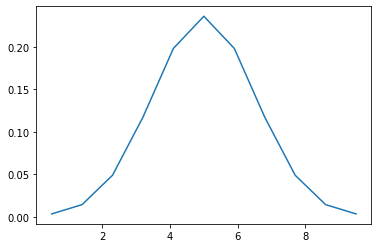

In [101]:
def normal(N,u,s,k):
    w=np.zeros(N)
    Z=np.linspace(u-s*k,u+s*k,N)
    pdf= lambda x: nm.pdf(x,u,s)
    z0=(Z[0]+Z[1])/2
    w[0]=nm.cdf(z0,u,s)
    for i in range(1,N-1):
        w[i]=qd(pdf,(Z[i-1]+Z[i])/2,(Z[i]+Z[i+1])/2)[0]
    zn=(Z[N-2]+Z[N-1])/2
    w[N-1]= 1-nm.cdf(zn,u,s)
    return Z,w
Z, w= normal(11,5,1.5,3)
print('Z:',Z)
print('w:',w)
plt.plot(Z, w)


**Exercise 2.3**

Z: [1.64872127e+00 4.05519997e+00 9.97418245e+00 2.45325302e+01
 6.03402876e+01 1.48413159e+02 3.65037468e+02 8.97847292e+02
 2.20834799e+03 5.43165959e+03 1.33597268e+04]
w: [0.00421105 0.01673138 0.05474925 0.12626227 0.2052815  0.2353349
 0.19024181 0.10843596 0.04357095 0.01233772 0.00284319]


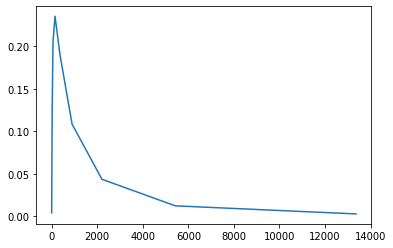

In [137]:
def logn(N,u,s,k):
    w=np.zeros(N)
    Z=np.linspace(u-s*k,u+s*k,N)
    Z=np.exp(Z)
    pdf= lambda x: lm.pdf(x, s,0,np.exp(u))
    z0=(Z[0]+Z[1])/2
    w[0]=lm.cdf(z0,s,0, np.exp(u))
    for i in range(1,N-1):
        w[i]=qd(pdf,(Z[i-1]+Z[i])/2,(Z[i]+Z[i+1])/2)[0]
    zn=(Z[N-2]+Z[N-1])/2
    w[N-1]= 1-lm.cdf(zn,s,0,np.exp(u))
    return Z,w
Z, w= logn(11,5,1.5,3)
print('Z:',Z)
print('w:',w)
plt.plot(Z, w)


**Exercise 2.4**

In [222]:
z,w=logn(11,10.5,0.8,3)
app=np.sum(z*w)
exp=np.e**(10.5+(0.8**2)/2)
print('Approximation:', app)
print('Real:', exp)
print('Difference:',abs(exp-app))

Approximation: 48949.75520908771
Real: 50011.08700852173
Difference: 1061.331799434025


**Exercise 3.1**

In [220]:
init_w=[1/3,1/3,1/3] 
init_x=[0,0,0]
init=init_w+init_x
def fc(x):
    fc = []
    for i in range(6):
        n=x[3:]
        w=x[:3]
        fc.append((10**(i+1)-(-10)**(i+1))/(i+1)-sum(w[j]*(n[j]**i) for j in range(3)))
    return fc
def G(f):
    app=0
    sol=op.root(fc,init).x
    w=sol[:3]
    n=sol[3:]
    for i in range(3):
        app+=f(n[i])*w[i]
    return app
app=G(g)
print('Gaussian Approximation:', app )
print('Gaussian Error:',abs(real_x-app))
print("Midpoint error: ", abs(mid-real_x))
print("Trapezoid error: ", abs(tp-real_x))
print("Simpsons error: ", abs(sim-real_x))
print('From the above comparison, we can see that Gaussian is significantly better\
than Midpoint and Trapezoid, but it is very close to Simpsons and both of them give\
relative accurate approximation.')

Gaussian Approximation: 4373.333334806089
Gaussian Error: 1.472755684517324e-06
Midpoint error:  0.34216083333285496
Trapezoid error:  0.6843266666674026
Simpsons error:  1.6666672308929265e-06
From the above comparison, we can see that Gaussian is significantly betterthan Midpoint and Trapezoid, but it is very close to Simpsons and both of them giverelative accurate approximation.


**Exercise 3.2**

In [217]:
v=qd(g,-10,10)[0]
print('Scipy Approximation:', v )
print('Scipy Error:',abs(real_x-v))
print('We can see that the error is to the level of 1e_13, which is extremely small. \
Scipy package provides the most accurate estimation comparing to other methods.')

Scipy Approximation: 4373.333333333334
Scipy Error: 9.094947017729282e-13
We can see that the error is to the level of 1e_13, which is extremely small. Scipy package provides the most accurate estimation comparing to other methods.


**Exercise 4.1**

In [231]:
np.random.seed=25
ff = lambda x,y: x**2+y**2<=1
def mc(f,O,N):
    x1=np.random.uniform(O[0],O[1],N)
    x2=np.random.uniform(O[2],O[3],N)
    insid=sum(f(x1,x2))
    area=(O[3]-O[2])*(O[1]-O[0])
    return insid*area/N
k=1
while (round(mc(ff,[-1,1,-1,1],k),4)!=3.1415):
    k+=1
else:
    print('Smallest Number:', k)

Smallest Number: 1300


**Exercise 4.2**

In [244]:
def isPrime(n):
    '''
    --------------------------------------------------------------------
    This function returns a boolean indicating whether an integer n is a
    prime number
    --------------------------------------------------------------------
    INPUTS:
    n = scalar, any scalar value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    i = integer in [2, sqrt(n)]

    FILES CREATED BY THIS FUNCTION: None

    RETURN: boolean
    --------------------------------------------------------------------
    '''
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True

def primes_ascend(N, min_val=2):
    '''
    --------------------------------------------------------------------
    This function generates an ordered sequence of N consecutive prime
    numbers, the smallest of which is greater than or equal to 1 using
    the Sieve of Eratosthenes algorithm.
    (https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
    --------------------------------------------------------------------
    INPUTS:
    N       = integer, number of elements in sequence of consecutive
              prime numbers
    min_val = scalar >= 2, the smallest prime number in the consecutive
              sequence must be greater-than-or-equal-to this value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        isPrime()

    OBJECTS CREATED WITHIN FUNCTION:
    primes_vec     = (N,) vector, consecutive prime numbers greater than
                     min_val
    MinIsEven      = boolean, =True if min_val is even, =False otherwise
    MinIsGrtrThn2  = boolean, =True if min_val is
                     greater-than-or-equal-to 2, =False otherwise
    curr_prime_ind = integer >= 0, running count of prime numbers found

    FILES CREATED BY THIS FUNCTION: None

    RETURN: primes_vec
    --------------------------------------------------------------------
    '''
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2

    return primes_vec

In [272]:
def es(n,d,sq):
    pm=primes_ascend(d, min_val=2)
    if sq=='weyl':
        return np.sqrt(pm)*n-np.floor(np.sqrt(pm)*n)
    elif sq=="haber":
        return n*(n+1)*np.sqrt(pm)/2-np.floor(n*(n+1)*np.sqrt(pm)/2)
    elif sq=="niederreiter":
        e = [i/(n+1) for i in range(1,d+1)]
        return np.power(2,e)*n-np.floor(np.power(2,e)*n)
    elif sq=="baker":
        r = [1/i for i in range(1,d+1)]
        Baker = np.exp(r)*n - np.floor(np.exp(r)*n)
        return Baker
print('Weyl:',es(1073,2,'weyl'))
print('Haber:',es(1073,2,'haber'))
print('Niederreiter:',es(1073,2,'niederreiter'))
print('Baker:',es(1073,2,'baker'))

Weyl: [0.45115243 0.49051652]
Haber: [0.26885294 0.40737199]
Niederreiter: [0.69272531 0.38589783]
Baker: [0.71640194 0.07792346]


**Exercise 4.3**Exercise 4.2****

In [275]:
np.random.seed=25
ff = lambda x,y: x**2+y**2<=1
def qmc(f,O,N,sq):
    x1=O[0]
    x2=O[1]
    y1=O[2]
    y2=O[3]
    a=((O[3]-O[2])*(O[1]-O[0]))
    xx = [(x2-x1)*es(i,2,sq)[0]+x1 for i in range(N)]
    yy = [(y2-y1)*es(i,2,sq)[1]+y1 for i in range(N)]  

    xx=np.array(xx)
    yy=np.array(yy)
    insid=sum(ff(xx,yy))
    return a*insid/N

k=1
while round(qmc(ff,[-1,1,-1,1],k,"weyl"),4)!=3.1415:
    k+=1    
print("Weyl:", k)

k=1
while round(qmc(ff,[-1,1,-1,1],k,"haber"),4)!=3.1415:
    k+=1    
print("Haber:", k)

k=1
while round(qmc(ff,[-1,1,-1,1],k,"niederreiter"),4)!=3.1415:
    k+=1  
    if k==2500:
        k='N value Larger than 2500, Cannot achieve 3.1415.'
        break
print("Niederreiter:", k)

k=1
while round(qmc(ff,[-1,1,-1,1],k,"baker"),4)!=3.1415:
    k+=1    
print("Baker:", k)

Weyl: 1230
Haber: 2064
Niederreiter: N value Larger than 2500, Cannot achieve 3.1415.
Baker: 205
